In [1]:
from GENIE3 import *
import sys, os
sys.path.append(os.getcwd())
sys.path.append('/scratch/ab9738/dfdl_imputation/')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import re
from scipy import stats
import SERGIO.SERGIO.sergio as sergio
from sklearn.metrics import roc_auc_score
from copy import deepcopy

In [14]:
ds1_clean = np.load('../SERGIO/imputation_data/DS1/DS6_clean_iter_0.npy')

In [3]:
def substitute_dataset(ds1):
    ds1[ds1 == 0] = np.nan
    for i in range(9):
        ds1_cell_type = ds1[:,i*300:(i+1)*300]
        mean_array = np.nanmean(ds1_cell_type, axis=1)
        var_array = np.nanvar(ds1_cell_type, axis=1)
        for j in range(100):
            ds1_cell_type[j,:] = np.random.normal(loc=mean_array[j],scale=np.sqrt(var_array[j]),size=300)
    ds1[ds1<0] = 0.0
    np.nan_to_num(ds1,copy=False)
    return(ds1)

In [4]:
ds1_substitute = substitute_dataset(ds1_clean.astype(float32))

In [5]:
VIM_substitute = GENIE3(np.transpose(ds1_substitute), nthreads=80, ntrees=100, regulators='all',\
                        gene_names=[str(s) for s in range(np.transpose(ds1_substitute).shape[1])])

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 80 threads
Elapsed time: 97.99 seconds


In [6]:
target_file = '../SERGIO/data_sets/De-noised_100G_9T_300cPerT_4_DS1/Interaction_cID_4.txt'

In [7]:
gt = np.zeros((100,100))
f = open(target_file,'r')
Lines = f.readlines()
f.close()
for j in range(len(Lines)):
    line = Lines[j]
    line_list = line.split(',')
    target_index = int(float(line_list[0]))
    num_regs = int(float(line_list[1]))
    for i in range(num_regs):
        try:
            reg_index = int(float(line_list[i+2]))
            gt[reg_index,target_index] = 1 
        except:
            continue

In [8]:
roc_auc_score(gt.flatten(),VIM_substitute.flatten())

0.6326471014181384

In [26]:
def get_distribution_range(ds1):
    ds1[ds1 == 0] = np.nan
    for i in range(9):
        ds1_cell_type = ds1[:,i*300:(i+1)*300]
        mean_array = np.nanmean(ds1_cell_type, axis=1)
        std_array = np.nanstd(ds1_cell_type, axis=1)
        print(np.max(mean_array), np.min(mean_array))
        print(np.max(std_array), np.min(std_array))
        fig = plt.figure()
        plt.scatter(mean_array, std_array)
        plt.show()
        plt.close(fig)

    return(0)

15.55933084317487 0.5078234992377517
4.85376602106579 0.45148483256049826


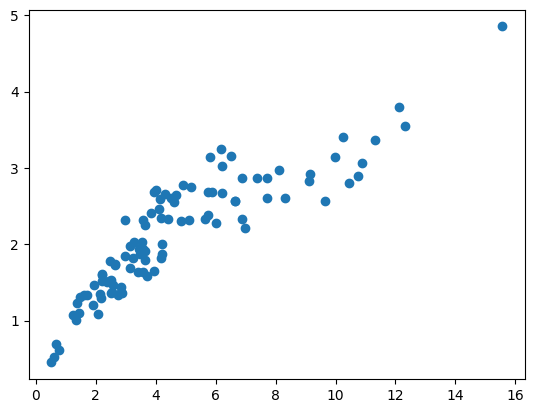

16.35935296943981 0.4557248656615886
4.659594186655359 0.3589303729912924


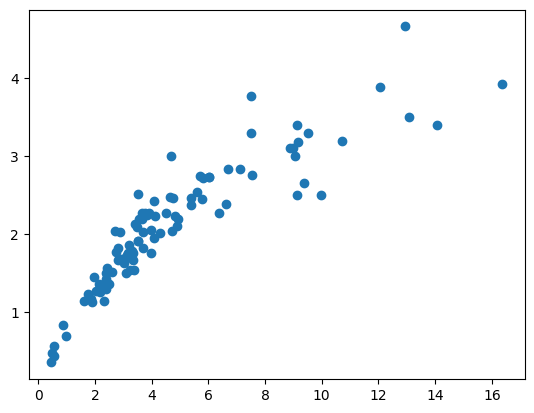

14.886210466949924 0.5192174348971355
4.291641801111263 0.5533856758869043


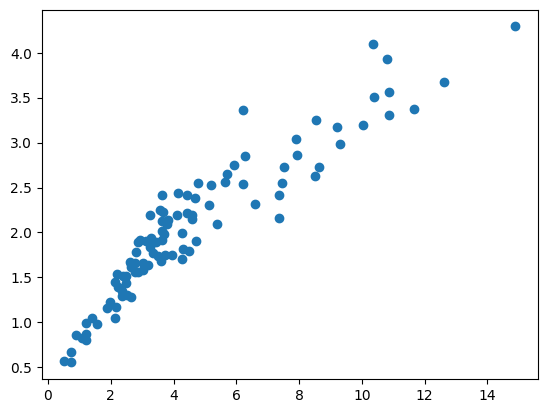

13.564458607177379 0.7575188567328313
4.410849420716378 0.6381986913467234


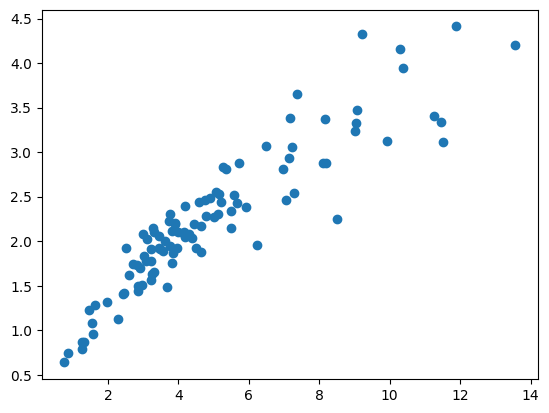

13.618611327296897 0.5298671535155819
4.104170725550972 0.4715196341769578


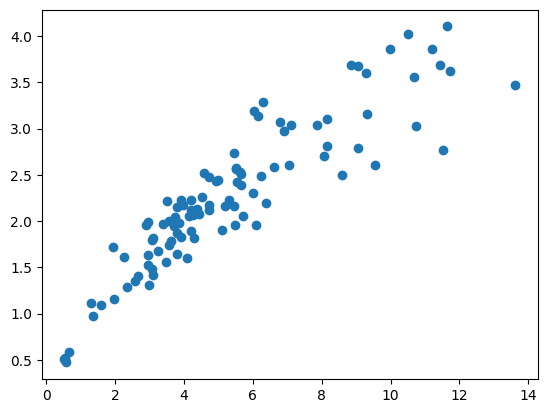

14.380087277291011 0.7232337786292535
4.359809741828583 0.5610140870468989


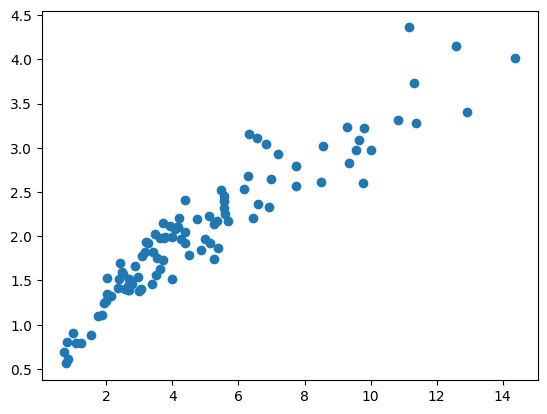

16.36279323035353 0.4974365987791946
4.083545805797965 0.42267239471583906


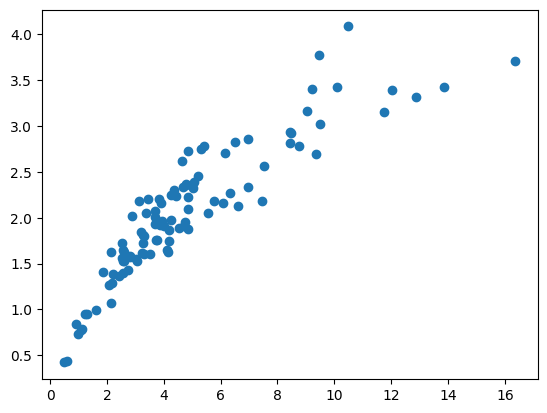

15.388176877587615 0.49066966493517006
5.092134434496019 0.47199220380792983


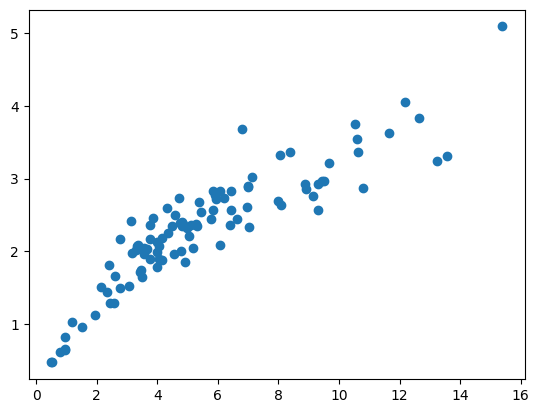

12.161762556407313 0.5022717631558185
4.641284031420763 0.524717491443339


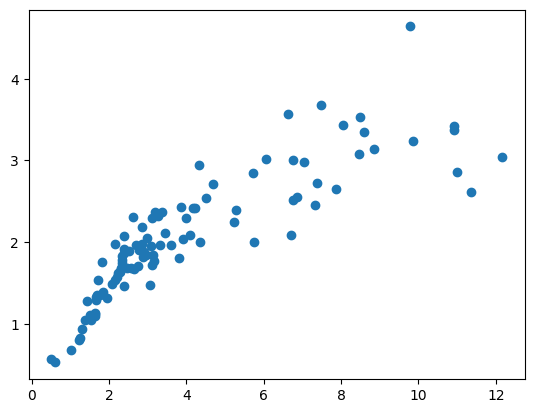

0

In [27]:
get_distribution_range(ds1_clean)

In [9]:
def normalized_substitute_dataset(ds1):
    ds1[ds1 == 0] = np.nan
    for i in range(9):
        ds1_cell_type = ds1[:,i*300:(i+1)*300]
        mean_array = np.nanmean(ds1_cell_type, axis=1)
        mean_array /= np.nansum(mean_array)
        std_array = np.nanstd(ds1_cell_type, axis=1)
        std_array /= np.nansum(mean_array)
        for j in range(100):
            ds1_cell_type[j,:] = np.random.normal(loc=mean_array[j],scale=std_array[j],size=300)
    ds1[ds1<0] = 0.0
    np.nan_to_num(ds1,copy=False)
    return(ds1)

In [10]:
ds1_normalized = normalized_substitute_dataset(ds1_clean.astype(float32))

In [11]:
VIM_normalized = GENIE3(np.transpose(ds1_normalized), nthreads=80, ntrees=100, regulators='all',\
                        gene_names=[str(s) for s in range(np.transpose(ds1_normalized).shape[1])])

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 80 threads
Elapsed time: 53.09 seconds


In [12]:
roc_auc_score(gt.flatten(),VIM_substitute.flatten())

0.6326471014181384

In [13]:
def novar_substitute_dataset(ds1):
    ds1[ds1 == 0] = np.nan
    for i in range(9):
        ds1_cell_type = ds1[:,i*300:(i+1)*300]
        mean_array = np.nanmean(ds1_cell_type, axis=1)
        mean_array /= np.nansum(mean_array)
        std_array = np.nanstd(ds1_cell_type, axis=1)
        std_array /= np.nansum(mean_array)
        for j in range(100):
            ds1_cell_type[j,:] = np.random.normal(loc=mean_array[j],scale=0.0,size=300)
    ds1[ds1<0] = 0.0
    np.nan_to_num(ds1,copy=False)
    return(ds1)

In [15]:
ds1_novar = novar_substitute_dataset(ds1_clean.astype(float32))

In [18]:
VIM_novar = GENIE3(np.transpose(ds1_novar), nthreads=80, ntrees=100, regulators='all',\
                        gene_names=[str(s) for s in range(np.transpose(ds1_novar).shape[1])])

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 80 threads
Elapsed time: 5.93 seconds


In [19]:
roc_auc_score(gt.flatten(),VIM_novar.flatten())

0.5678811793894891